C:\Users\user\AppData\Local\Temp\ipykernel_10376\2093545.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_all['Date'] = pd.to_datetime(df_all['Date'], errors='coerce')
C:\Users\user\AppData\Local\Temp\ipykernel_10376\2093545.py:31: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_all.ffill(inplace=True)


Dropped non-numeric columns:
 ['Soil 4', 'Soil ', 'Leaf ']


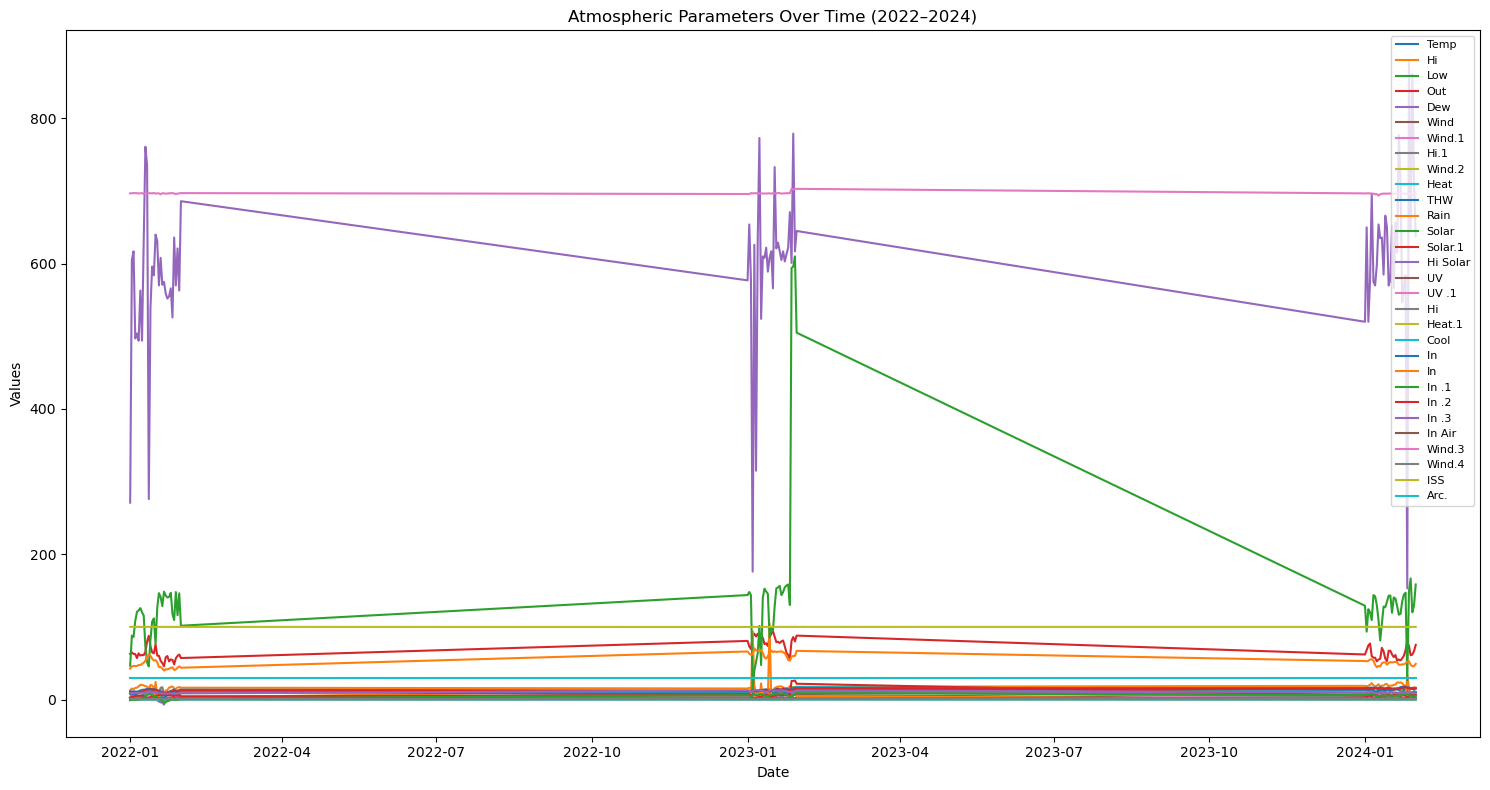

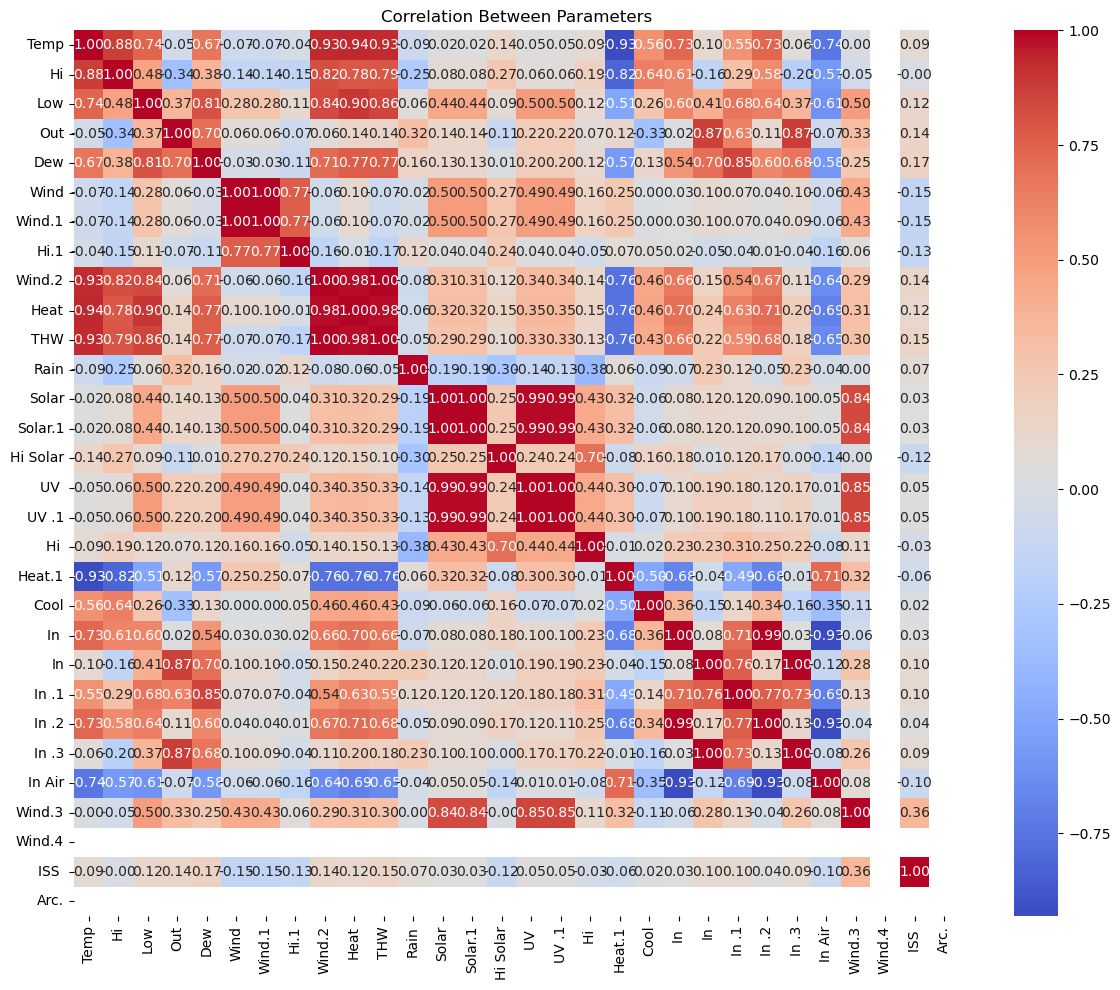

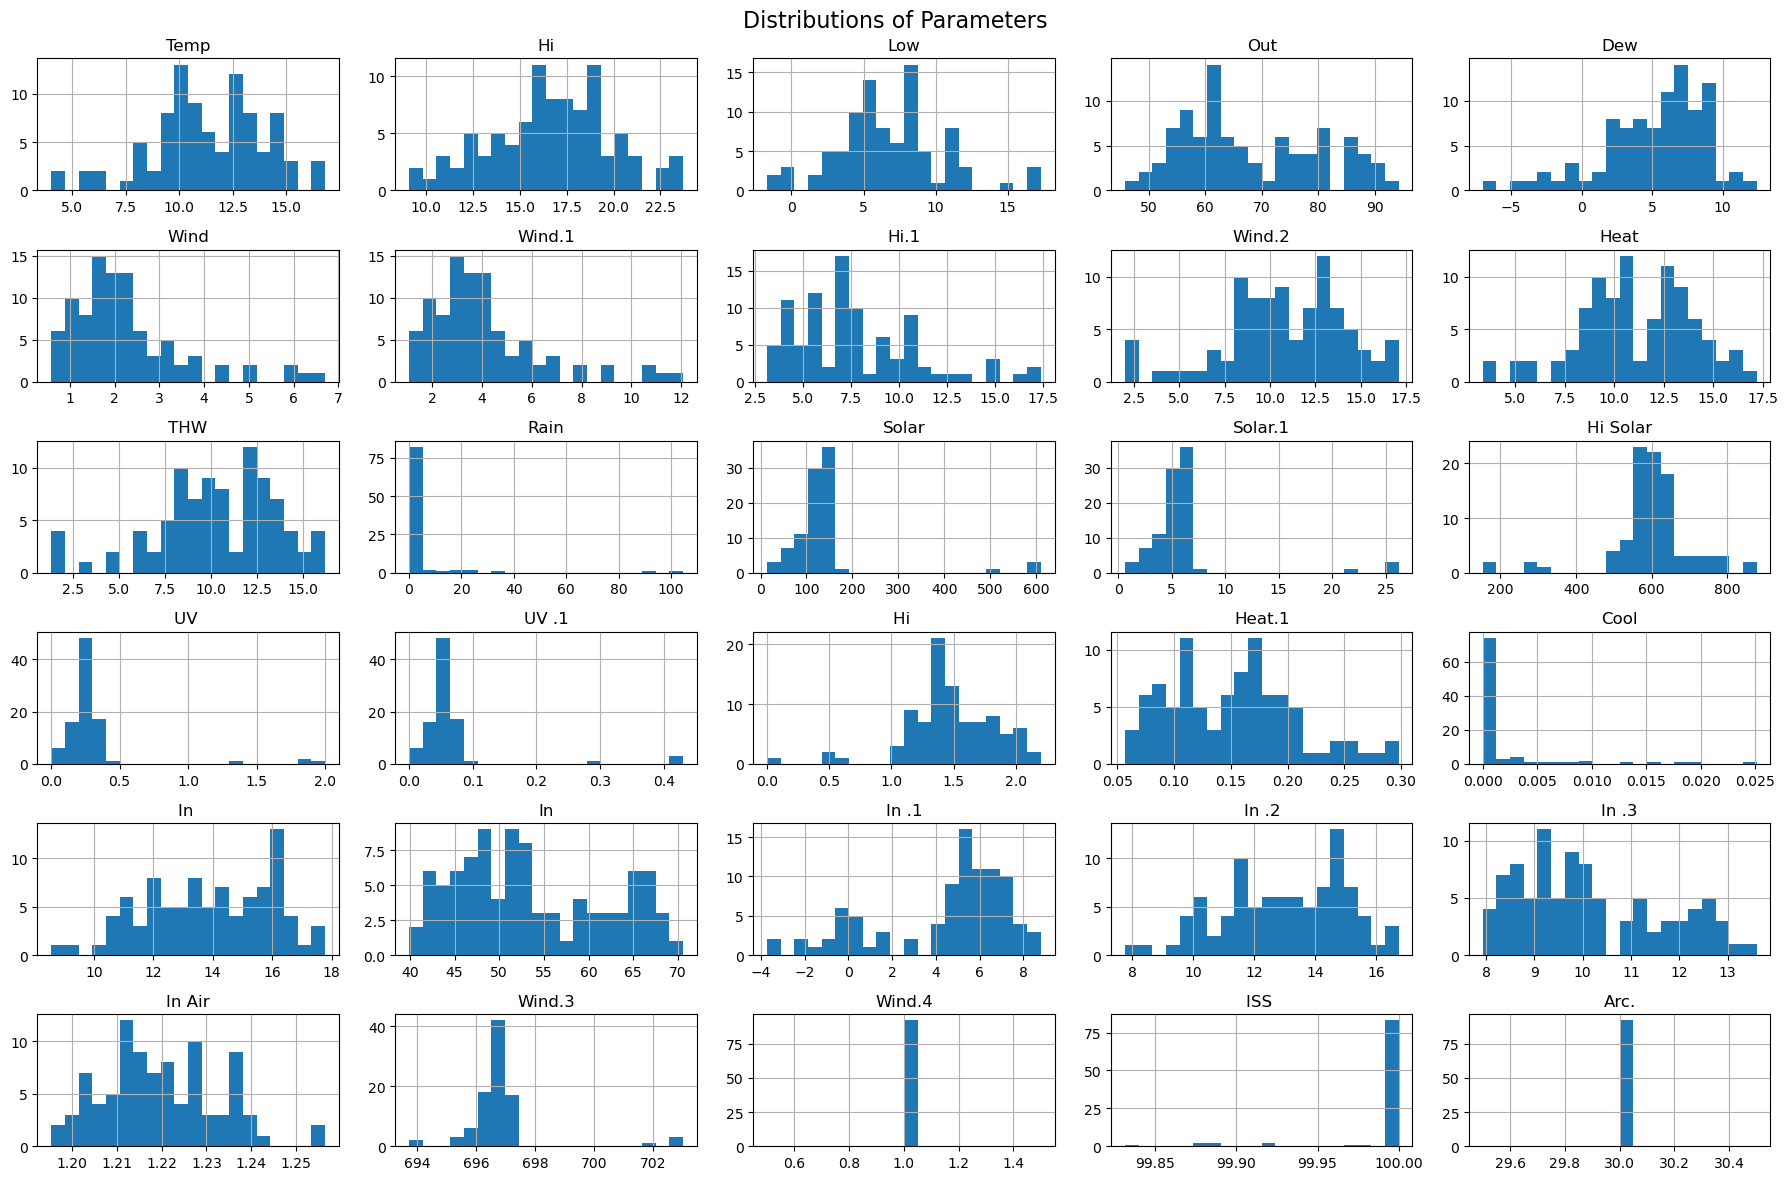

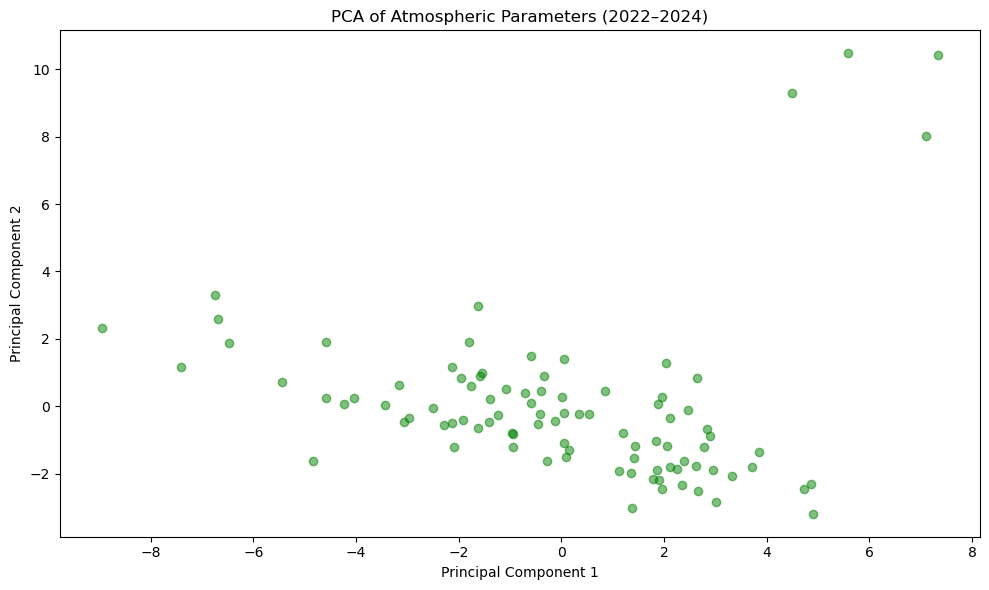


Top Features Correlated with Solar Irradiance:
Solar       1.000000
Solar.1     1.000000
UV          0.986713
UV .1       0.986668
Wind.3      0.837674
Wind        0.504199
Wind.1      0.503550
Low         0.443772
Hi          0.431601
Heat.1      0.319676
Heat        0.315369
Wind.2      0.307512
THW         0.288222
Hi Solar    0.249800
Out         0.136635
Dew         0.127353
In          0.117716
In .1       0.115945
In .3       0.095941
In .2       0.088986
In          0.083976
Hi          0.081549
In Air      0.046623
Hi.1        0.035762
ISS         0.030252
Temp        0.021651
Cool       -0.060521
Rain       -0.185552
Wind.4           NaN
Arc.             NaN
Name: Solar, dtype: float64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Function to load the first sheet from an Excel file
def load_first_sheet(filepath):
    xls = pd.read_excel(filepath, sheet_name=None)
    first_sheet = list(xls.keys())[0]
    df = xls[first_sheet]
    df = df.reset_index(drop=True)
    return df

# Load Excel files
df_2022 = load_first_sheet("C:/Users/user/Desktop/1/daily2022_١٠٥٢٣٧.xlsx")
df_2023 = load_first_sheet("C:/Users/user/Desktop/1/daily2023_١٠٥١٠٧.xlsx")
df_2024 = load_first_sheet("C:/Users/user/Desktop/1/daily2024_١٠٥١١٨.xlsx")

# Combine all years
df_all = pd.concat([df_2022, df_2023, df_2024], ignore_index=True)

# Rename first column to "Date" and convert to datetime
df_all.rename(columns={df_all.columns[0]: "Date"}, inplace=True)
df_all['Date'] = pd.to_datetime(df_all['Date'], errors='coerce')
df_all = df_all.dropna(subset=['Date']).sort_values(by='Date')

# Drop unnamed and mostly empty columns
df_all = df_all.loc[:, ~df_all.columns.str.contains("^Unnamed")]
df_all.ffill(inplace=True)

# Drop non-numeric columns except "Date"
non_numeric_cols = df_all.select_dtypes(exclude=[np.number]).columns.drop("Date", errors='ignore')
print("Dropped non-numeric columns:\n", non_numeric_cols.tolist())
df_numeric = df_all.drop(columns=non_numeric_cols)

# =================== ANALYSIS ===================

# 1. Plot each numeric parameter over time
plt.figure(figsize=(15, 8))
for col in df_numeric.columns:
    if col != 'Date':
        plt.plot(df_numeric['Date'], df_numeric[col], label=col)
plt.legend(loc='upper right', fontsize=8)
plt.title('Atmospheric Parameters Over Time (2022–2024)')
plt.xlabel('Date')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

# 2. Correlation heatmap
plt.figure(figsize=(12, 10))
corr = df_numeric.drop(columns='Date').corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Between Parameters')
plt.tight_layout()
plt.show()

# 3. Distribution histograms
numeric_cols = df_numeric.select_dtypes(include=np.number).columns
df_numeric[numeric_cols].hist(figsize=(18, 12), bins=20)
plt.suptitle('Distributions of Parameters', fontsize=16)
plt.tight_layout()
plt.show()

# 4. PCA plot
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric[numeric_cols])
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='green', alpha=0.5)
plt.title('PCA of Atmospheric Parameters (2022–2024)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

# 5. Optional: Show top correlated with Solar if exists
if 'Solar' in corr.columns:
    print("\nTop Features Correlated with Solar Irradiance:")
    print(corr['Solar'].sort_values(ascending=False))


In [2]:
import pandas as pd

# Save the combined cleaned data to Excel
cleaned_data_path = "C:/Users/user/Desktop/1/combined_cleaned_2022_2024.xlsx"
df_numeric.to_excel(cleaned_data_path, index=False)

# Save correlation matrix to Excel
correlation_path = "C:/Users/user/Desktop/1/correlation_matrix.xlsx"
corr.to_excel(correlation_path)

# Save PCA components to Excel
pca_components = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_path = "C:/Users/user/Desktop/1/pca_components.xlsx"
pca_components.to_excel(pca_path, index=False)

# Print file paths (You can then manually move these files where needed)
print(f"Cleaned data saved to: {cleaned_data_path}")
print(f"Correlation matrix saved to: {correlation_path}")
print(f"PCA components saved to: {pca_path}")


Cleaned data saved to: C:/Users/user/Desktop/combined_cleaned_2022_2024.xlsx
Correlation matrix saved to: C:/Users/user/Desktop/correlation_matrix.xlsx
PCA components saved to: C:/Users/user/Desktop/pca_components.xlsx
